# Parte 1 - Laboratorio 5

In [1]:
import pandas as pd
import numpy as np
import  re
import  matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse, urlencode
from pandas_profiling import ProfileReport

pd.options.display.max_colwidth = 200

In [2]:
df1 = pd.read_csv('packets.csv')
df1.head()

Unnamed: 0  version  ihl  tos   len     id flags  frag  ttl  proto  ...  \
0           0        4    5    0   961      1   NaN     0   64     17  ...   
1           1        4    5   32    84  58919   NaN     0  122     17  ...   
2           2        4    5    0   975      1   NaN     0   64     17  ...   
3           3        4    5   32    84  59493   NaN     0  122     17  ...   
4           4        4    5    0  1012      1   NaN     0   64     17  ...   

   dataofs reserved flags.1  window  chksum.1  urgptr  options.1  payload  \
0      NaN      NaN     NaN     NaN     62990     NaN        NaN      933   
1      NaN      NaN     NaN     NaN     65061     NaN        NaN       56   
2      NaN      NaN     NaN     NaN     36378     NaN        NaN      947   
3      NaN      NaN     NaN     NaN     65063     NaN        NaN       56   
4      NaN      NaN     NaN     NaN     63846     NaN        NaN      984   

                                                                                                                                                                                               payload_raw  \
0  b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01\xef\xbf\xbdPNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01b\x00\x00\x00\xef\xbf\xbd\x08\x06\x00\x00\x00(\xef\xbf...   
1             b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01\xc0\x0c\x00\x1c\x00\x01\x00\x00\x01+\x00\x10&\x07\xf8\xb0@\x05\x08\x07\x00\x00\x00\x00\x00\x00 \x0e'   
2  b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01:\xef\xbf\xbdle:\xc7\xa9\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\x0c\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd:|\x11\xe...   
3             b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01\xc0\x0c\x00\x1c\x00\x01\x00\x00\x01)\x00\x10&\x07\xf8\xb0@\x05\x08\x07\x00\x00\x00\x00\x00\x00 \x0e'   
4  b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01\xef\xbf\xbd\xef\xbf\xbd^n\xef\xbf\xbd\'\'\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd$\xef\xbf\xbd\xef\xbf\xbd\xef\x...   

                                                                                                                                                                                               payload_hex  
0  b'000c0100000100000000000006676f6f676c6503636f6d00001c0001efbfbd504e470d0a1a0a0000000d4948445200000162000000efbfbd080600000028efbfbd545200003aefbfbd4944415478efbfbdefbfbd097c54efbfbdefbfbdefbfbdef...  
1                                                                                      b'000c8180000100010000000006676f6f676c6503636f6d00001c0001c00c001c00010000012b00102607f8b040050807000000000000200e'  
2  b'000c0100000100000000000006676f6f676c6503636f6d00001c00013aefbfbd6c653ac7a9efbfbdefbfbdefbfbd0cefbfbdefbfbdefbfbd3a7c11efbfbd58efbfbdefbfbd712e65efbfbdefbfbdefbfbd611230efbfbd4a7d340a3924767aefbf...  
3                                                                                      b'000c8180000100010000000006676f6f676c6503636f6d00001c0001c00c001c00010000012900102607f8b040050807000000000000200e'  
4  b'000c0100000100000000000006676f6f676c6503636f6d00001c0001efbfbdefbfbd5e6eefbfbd2727efbfbdefbfbdefbfbd24efbfbdefbfbdefbfbdefbfbdefbfbd52efbfbdefbfbdefbfbd17efbfbd3e45706f75efbfbdefbfbd24efbfbdefbf...  

[5 rows x 29 columns]

In [3]:
df2 = pd.read_csv('our_packets.csv')
df2.head()

Unnamed: 0  version  ihl  tos  len     id flags  frag  ttl  proto  ...  \
0           0        4    5    0  905  59503    DF     0   64      6  ...   
1           1        4    5    0   52  53876    DF     0   64      6  ...   
2           2        4    5    0  905  55766    DF     0   64      6  ...   
3           3        4    5    0   52  36601    DF     0   64      6  ...   
4           4        4    5    0  984  14683    DF     0   64      6  ...   

   dataofs reserved flags.1  window  chksum.1  urgptr  options.1  payload  \
0        8        0      PA     501     23481       0          3      853   
1        8        0       A     501     22628       0          3        0   
2        8        0      PA     501     23481       0          3      853   
3        8        0       A     501     22628       0          3        0   
4        8        0      PA     501     23558       0          3      932   

                                                                                                                                                                                               payload_raw  \
0  b'\x81~\x03Q{"header": {"msg_id": "d58f3b7d-f43d96cf7eb2647100805a9e", "msg_type": "execute_input", "username": "username", "session": "6d359399-bdc83f1d36ee2df0c676c17c", "date": "2022-04-02T02:4...   
1                                                                                                                                                                                                      b''   
2  b'\x81~\x03Q{"header": {"msg_id": "d58f3b7d-f43d96cf7eb2647100805a9e", "msg_type": "execute_input", "username": "username", "session": "6d359399-bdc83f1d36ee2df0c676c17c", "date": "2022-04-02T02:4...   
3                                                                                                                                                                                                      b''   
4  b'HTTP/1.1 200 OK\r\nContent-Type: text/plain; charset=UTF-8\r\nContent-Length: 703\r\nAccess-Control-Allow-Origin: *\r\nSet-Cookie: io=s5Vyxg5QkGBdyalgAAAA; Path=/; HttpOnly\r\nDate: Sat, 02 Apr ...   

                                                                                                                                                                                               payload_hex  
0  b'817e03517b22686561646572223a207b226d73675f6964223a202264353866336237642d663433643936636637656232363437313030383035613965222c20226d73675f74797065223a2022657865637574655f696e707574222c202275736572...  
1                                                                                                                                                                                                      b''  
2  b'817e03517b22686561646572223a207b226d73675f6964223a202264353866336237642d663433643936636637656232363437313030383035613965222c20226d73675f74797065223a2022657865637574655f696e707574222c202275736572...  
3                                                                                                                                                                                                      b''  
4  b'485454502f312e3120323030204f4b0d0a436f6e74656e742d547970653a20746578742f706c61696e3b20636861727365743d5554462d380d0a436f6e74656e742d4c656e6774683a203730330d0a4163636573732d436f6e74726f6c2d416c6c...  

[5 rows x 29 columns]

In [4]:
df1 = df1.drop(['Unnamed: 0'], axis=1)
df2 = df2.drop(['Unnamed: 0'], axis=1)

In [5]:
df = pd.concat([df1, df2], ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   version      162 non-null    int64  
 1   ihl          162 non-null    int64  
 2   tos          162 non-null    int64  
 3   len          162 non-null    int64  
 4   id           162 non-null    int64  
 5   flags        102 non-null    object 
 6   frag         162 non-null    int64  
 7   ttl          162 non-null    int64  
 8   proto        162 non-null    int64  
 9   chksum       162 non-null    int64  
 10  src          162 non-null    object 
 11  dst          162 non-null    object 
 12  options      162 non-null    int64  
 13  time         162 non-null    float64
 14  sport        162 non-null    int64  
 15  dport        162 non-null    int64  
 16  seq          100 non-null    float64
 17  ack          100 non-null    float64
 18  dataofs      100 non-null    float64
 19  reserved

### Valores de algunas columnas

In [7]:
df['src'].value_counts()

172.28.0.2     48
172.28.0.1     36
10.1.10.53     31
84.54.22.33    29
172.28.0.3     16
75.75.75.75     2
Name: src, dtype: int64

In [8]:
df['dst'].value_counts()

172.28.0.2     52
172.28.0.1     32
10.1.10.53     31
84.54.22.33    29
172.28.0.3     16
75.75.75.75     2
Name: dst, dtype: int64

In [9]:
df['sport'].value_counts()

53       60
8080     32
32824    16
60872    13
6000     11
60946     7
9000      5
51626     5
51646     5
60986     4
15812     1
23903     1
32860     1
51000     1
Name: sport, dtype: int64

In [10]:
df['dport'].value_counts()

53       60
8080     36
32824    14
60872    13
6000     11
9000      5
60946     5
51626     5
51646     5
60986     4
15812     1
23903     1
32860     1
51000     1
Name: dport, dtype: int64

### Estadísticas

In [11]:
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

Bar Plot of src


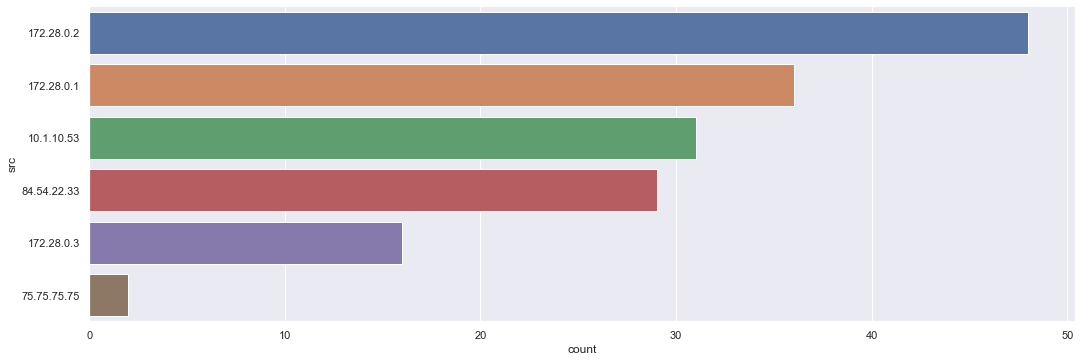

Summary of src


count  relative_pct
172.28.0.2      48          0.30
172.28.0.1      36          0.22
10.1.10.53      31          0.19
84.54.22.33     29          0.18
172.28.0.3      16          0.10
75.75.75.75      2          0.01

In [12]:
#  IP origen que más aparece
eda_cat(df, x = "src")

Bar Plot of dst


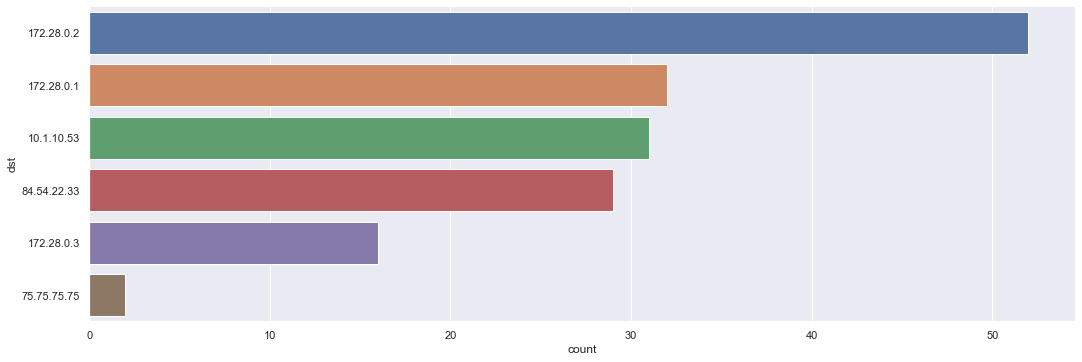

Summary of dst


count  relative_pct
172.28.0.2      52          0.32
172.28.0.1      32          0.20
10.1.10.53      31          0.19
84.54.22.33     29          0.18
172.28.0.3      16          0.10
75.75.75.75      2          0.01

In [13]:
# IP destino que más aparece
eda_cat(df, x = "dst")

In [14]:
# ¿A qué IPs se comunica la IP del inciso a?
df_inciso_c = df[df['src']=='172.28.0.2']
df_inciso_c[['src', 'dst']]

src         dst
62   172.28.0.2  172.28.0.3
65   172.28.0.2  172.28.0.3
66   172.28.0.2  172.28.0.1
69   172.28.0.2  172.28.0.1
70   172.28.0.2  172.28.0.1
73   172.28.0.2  172.28.0.1
75   172.28.0.2  172.28.0.1
76   172.28.0.2  172.28.0.1
79   172.28.0.2  172.28.0.1
82   172.28.0.2  172.28.0.1
83   172.28.0.2  172.28.0.1
86   172.28.0.2  172.28.0.3
88   172.28.0.2  172.28.0.3
89   172.28.0.2  172.28.0.1
91   172.28.0.2  172.28.0.3
94   172.28.0.2  172.28.0.1
95   172.28.0.2  172.28.0.3
96   172.28.0.2  172.28.0.3
99   172.28.0.2  172.28.0.3
101  172.28.0.2  172.28.0.1
104  172.28.0.2  172.28.0.3
106  172.28.0.2  172.28.0.1
109  172.28.0.2  172.28.0.1
110  172.28.0.2  172.28.0.1
113  172.28.0.2  172.28.0.1
115  172.28.0.2  172.28.0.1
118  172.28.0.2  172.28.0.1
120  172.28.0.2  172.28.0.1
121  172.28.0.2  172.28.0.1
124  172.28.0.2  172.28.0.1
126  172.28.0.2  172.28.0.1
127  172.28.0.2  172.28.0.1
130  172.28.0.2  172.28.0.1
132  172.28.0.2  172.28.0.1
133  172.28.0.2  172.28.0.1
137  172.28.0.2  172.28.0.1
138  172.28.0.2  172.28.0.1
140  172.28.0.2  172.28.0.1
143  172.28.0.2  172.28.0.1
145  172.28.0.2  172.28.0.3
147  172.28.0.2  172.28.0.3
148  172.28.0.2  172.28.0.3
151  172.28.0.2  172.28.0.3
152  172.28.0.2  172.28.0.3
155  172.28.0.2  172.28.0.3
157  172.28.0.2  172.28.0.1
159  172.28.0.2  172.28.0.3
161  172.28.0.2  172.28.0.1

Bar Plot of dst


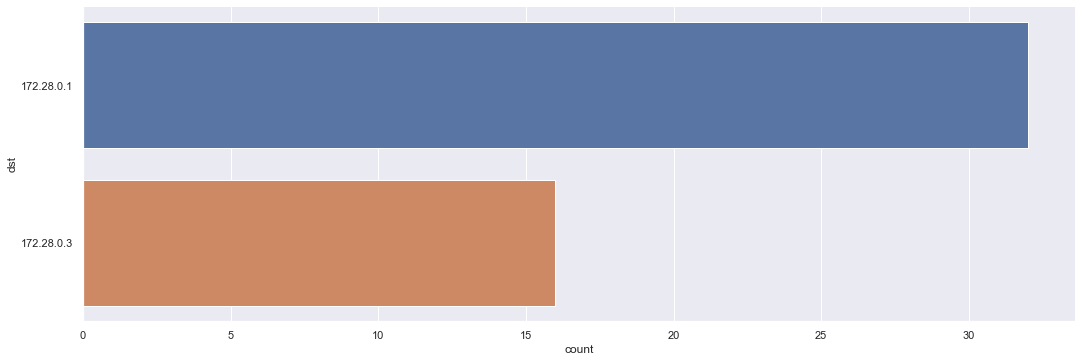

Summary of dst


count  relative_pct
172.28.0.1     32          0.67
172.28.0.3     16          0.33

In [15]:
eda_cat(df_inciso_c, x = "dst")

In [16]:
# ¿A qué puertos destino se comunica la IP del inciso a?
df_inciso_d = df[df['src']=='172.28.0.2']
df_inciso_d[['src', 'dport']]

src  dport
62   172.28.0.2  32860
65   172.28.0.2   6000
66   172.28.0.2  60872
69   172.28.0.2  60872
70   172.28.0.2  60872
73   172.28.0.2  60872
75   172.28.0.2  60872
76   172.28.0.2  60872
79   172.28.0.2  60872
82   172.28.0.2  60946
83   172.28.0.2  60946
86   172.28.0.2   6000
88   172.28.0.2   6000
89   172.28.0.2  60872
91   172.28.0.2   6000
94   172.28.0.2  60946
95   172.28.0.2  60986
96   172.28.0.2  60986
99   172.28.0.2   6000
101  172.28.0.2  60946
104  172.28.0.2   6000
106  172.28.0.2  60946
109  172.28.0.2  60872
110  172.28.0.2  60872
113  172.28.0.2  60872
115  172.28.0.2  32824
118  172.28.0.2  32824
120  172.28.0.2  32824
121  172.28.0.2  32824
124  172.28.0.2  32824
126  172.28.0.2  32824
127  172.28.0.2  32824
130  172.28.0.2  32824
132  172.28.0.2  32824
133  172.28.0.2  32824
137  172.28.0.2  32824
138  172.28.0.2  32824
140  172.28.0.2  60872
143  172.28.0.2  60872
145  172.28.0.2   6000
147  172.28.0.2   6000
148  172.28.0.2   6000
151  172.28.0.2  60986
152  172.28.0.2  60986
155  172.28.0.2   6000
157  172.28.0.2  32824
159  172.28.0.2   6000
161  172.28.0.2  32824

Bar Plot of dport


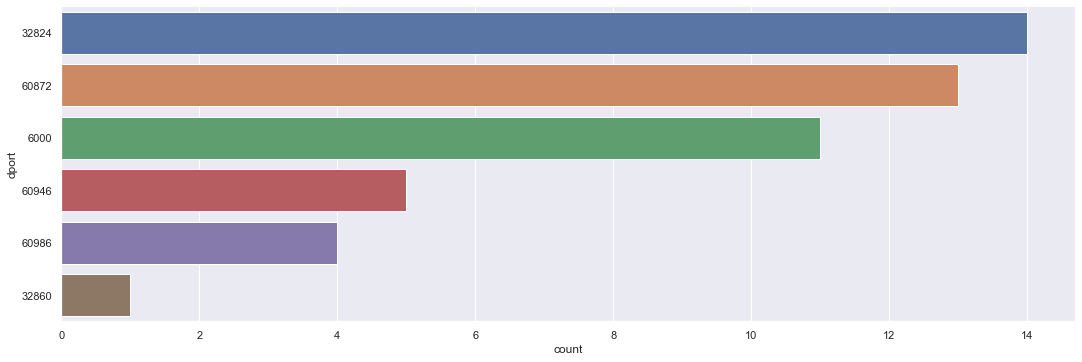

Summary of dport


count  relative_pct
32824     14          0.29
60872     13          0.27
6000      11          0.23
60946      5          0.10
60986      4          0.08
32860      1          0.02

In [17]:
eda_cat(df_inciso_d, x = "dport")

In [18]:
# ¿A qué puertos origen se comunica la IP del inciso a?
df_inciso_e = df[df['src']=='172.28.0.2']
df_inciso_e[['src', 'sport']]

src  sport
62   172.28.0.2   9000
65   172.28.0.2  51000
66   172.28.0.2   8080
69   172.28.0.2   8080
70   172.28.0.2   8080
73   172.28.0.2   8080
75   172.28.0.2   8080
76   172.28.0.2   8080
79   172.28.0.2   8080
82   172.28.0.2   8080
83   172.28.0.2   8080
86   172.28.0.2  51626
88   172.28.0.2  51626
89   172.28.0.2   8080
91   172.28.0.2  51626
94   172.28.0.2   8080
95   172.28.0.2   9000
96   172.28.0.2   9000
99   172.28.0.2  51626
101  172.28.0.2   8080
104  172.28.0.2  51626
106  172.28.0.2   8080
109  172.28.0.2   8080
110  172.28.0.2   8080
113  172.28.0.2   8080
115  172.28.0.2   8080
118  172.28.0.2   8080
120  172.28.0.2   8080
121  172.28.0.2   8080
124  172.28.0.2   8080
126  172.28.0.2   8080
127  172.28.0.2   8080
130  172.28.0.2   8080
132  172.28.0.2   8080
133  172.28.0.2   8080
137  172.28.0.2   8080
138  172.28.0.2   8080
140  172.28.0.2   8080
143  172.28.0.2   8080
145  172.28.0.2  51646
147  172.28.0.2  51646
148  172.28.0.2  51646
151  172.28.0.2   9000
152  172.28.0.2   9000
155  172.28.0.2  51646
157  172.28.0.2   8080
159  172.28.0.2  51646
161  172.28.0.2   8080

Bar Plot of sport


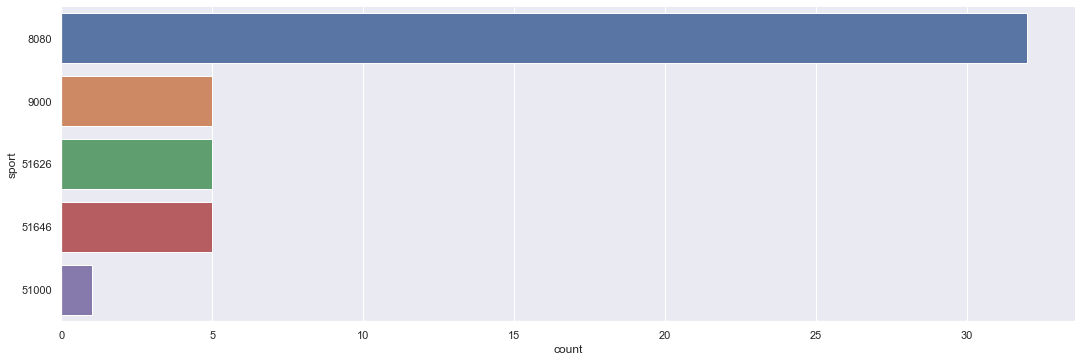

Summary of sport


count  relative_pct
8080      32          0.67
9000       5          0.10
51626      5          0.10
51646      5          0.10
51000      1          0.02

In [19]:
eda_cat(df_inciso_e, x = "sport")

#### ¿Para que se utiliza el puerto que más aparece en el inciso d y e?
El puerto destino 32824 se usa con el Protocolo de control de transmisión (TCP). TCP es uno de los principales protocolos en las redes TCP/IP y se enfoca en la conexión. Para poder utilizarlo se necesita un protocolo de enlace encargado de establecer comunicaciones de extremo a extremo y solo cuando se establece una conexión, los datos del usuario se pueden enviar de manera bidireccional a través de la conexión.

El puerto origen 8080 se usa más para servidores webs, es decir conexiones a internet

### Gráficas

src
10.1.10.53     AxesSubplot(0.125,0.125;0.775x0.755)
172.28.0.1     AxesSubplot(0.125,0.125;0.775x0.755)
172.28.0.2     AxesSubplot(0.125,0.125;0.775x0.755)
172.28.0.3     AxesSubplot(0.125,0.125;0.775x0.755)
75.75.75.75    AxesSubplot(0.125,0.125;0.775x0.755)
84.54.22.33    AxesSubplot(0.125,0.125;0.775x0.755)
Name: payload, dtype: object

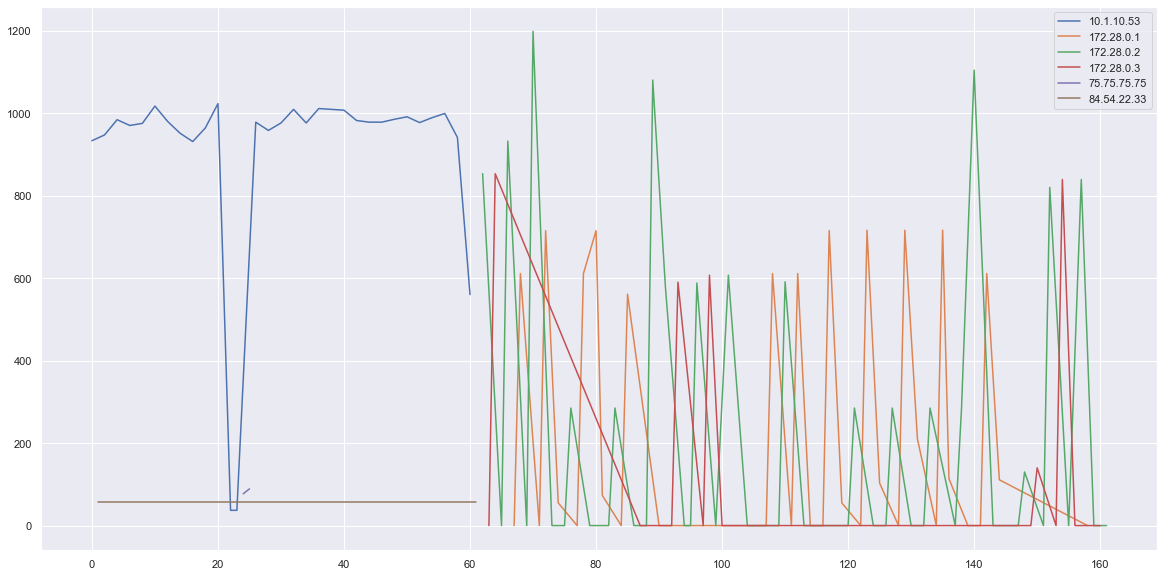

In [20]:
# Muestre una gráfica 2D, en el eje Y lasIPs destino, y en el eje X la suma de los payloads 
# recibidos en dichas direcciones
df.groupby('src')['payload'].plot(legend=True, figsize=(20, 10))

dst
10.1.10.53     AxesSubplot(0.125,0.125;0.775x0.755)
172.28.0.1     AxesSubplot(0.125,0.125;0.775x0.755)
172.28.0.2     AxesSubplot(0.125,0.125;0.775x0.755)
172.28.0.3     AxesSubplot(0.125,0.125;0.775x0.755)
75.75.75.75    AxesSubplot(0.125,0.125;0.775x0.755)
84.54.22.33    AxesSubplot(0.125,0.125;0.775x0.755)
Name: payload, dtype: object

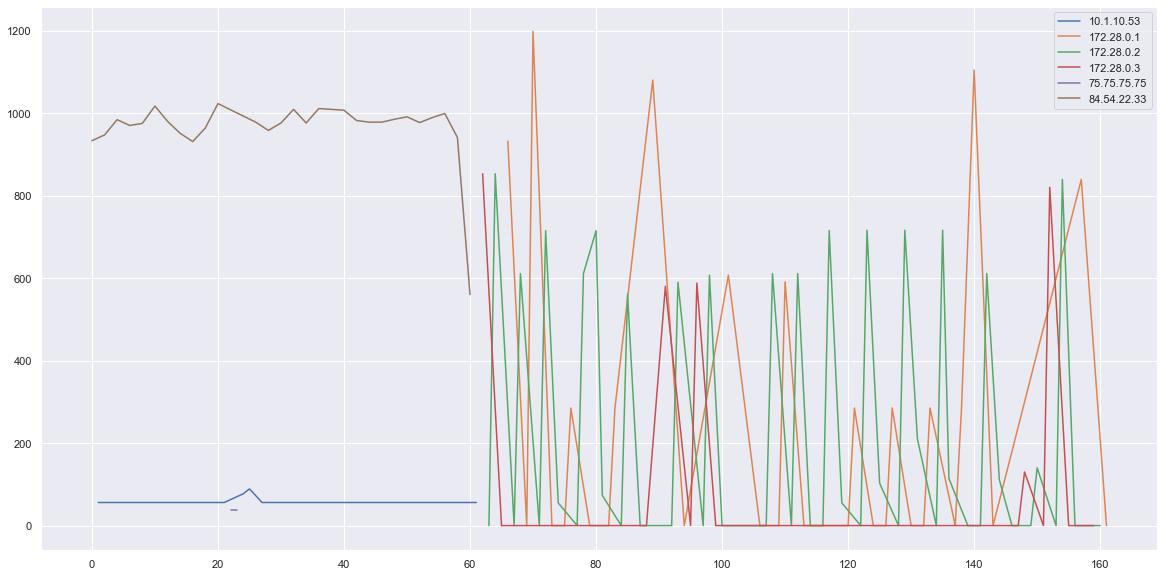

In [21]:
# Muestre una gráfica 2D, en el eje Y lasIPs destino, y en el eje X la suma de los payloads 
# recibidos en dichas direcciones
df.groupby('dst')['payload'].plot(legend=True, figsize=(20, 10))

sport
53       AxesSubplot(0.125,0.125;0.775x0.755)
6000     AxesSubplot(0.125,0.125;0.775x0.755)
8080     AxesSubplot(0.125,0.125;0.775x0.755)
9000     AxesSubplot(0.125,0.125;0.775x0.755)
15812    AxesSubplot(0.125,0.125;0.775x0.755)
23903    AxesSubplot(0.125,0.125;0.775x0.755)
32824    AxesSubplot(0.125,0.125;0.775x0.755)
32860    AxesSubplot(0.125,0.125;0.775x0.755)
51000    AxesSubplot(0.125,0.125;0.775x0.755)
51626    AxesSubplot(0.125,0.125;0.775x0.755)
51646    AxesSubplot(0.125,0.125;0.775x0.755)
60872    AxesSubplot(0.125,0.125;0.775x0.755)
60946    AxesSubplot(0.125,0.125;0.775x0.755)
60986    AxesSubplot(0.125,0.125;0.775x0.755)
Name: payload, dtype: object

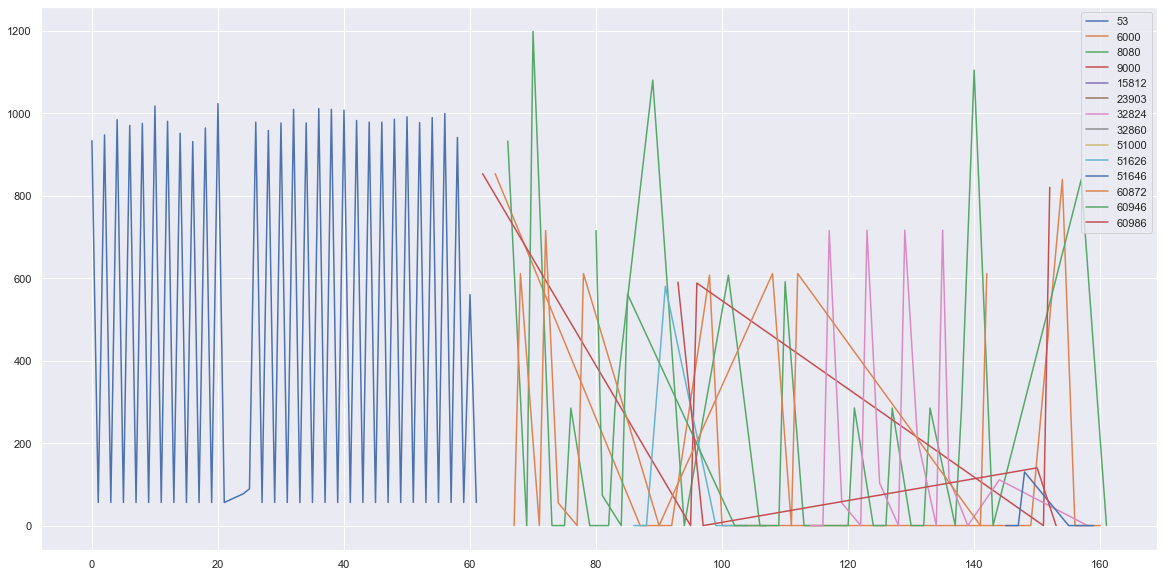

In [22]:
# Muestre una gráfica 2D, en el eje Y los puertos origen, y en el eje X la suma de los 
# payloads enviados de dichos puertos
df.groupby('sport')['payload'].plot(legend=True, figsize=(20, 10))

dport
53       AxesSubplot(0.125,0.125;0.775x0.755)
6000     AxesSubplot(0.125,0.125;0.775x0.755)
8080     AxesSubplot(0.125,0.125;0.775x0.755)
9000     AxesSubplot(0.125,0.125;0.775x0.755)
15812    AxesSubplot(0.125,0.125;0.775x0.755)
23903    AxesSubplot(0.125,0.125;0.775x0.755)
32824    AxesSubplot(0.125,0.125;0.775x0.755)
32860    AxesSubplot(0.125,0.125;0.775x0.755)
51000    AxesSubplot(0.125,0.125;0.775x0.755)
51626    AxesSubplot(0.125,0.125;0.775x0.755)
51646    AxesSubplot(0.125,0.125;0.775x0.755)
60872    AxesSubplot(0.125,0.125;0.775x0.755)
60946    AxesSubplot(0.125,0.125;0.775x0.755)
60986    AxesSubplot(0.125,0.125;0.775x0.755)
Name: payload, dtype: object

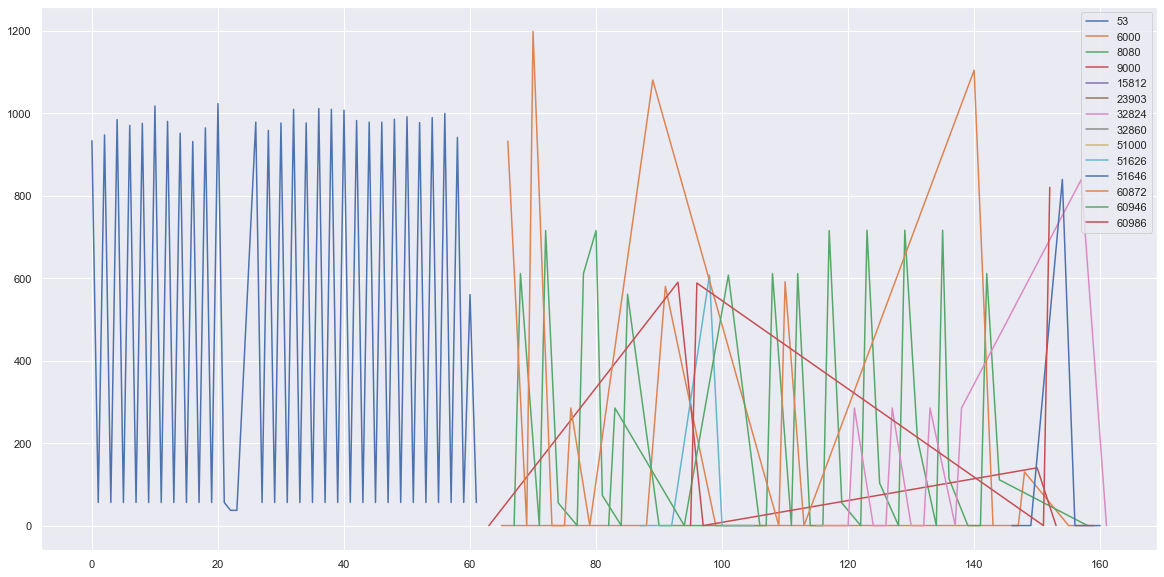

In [23]:
# Muestre una gráfica 2D, en el eje Y los puertos destino, y en el eje X la suma de los 
# payloads recibidos en dichos puertos
df.groupby('dport')['payload'].plot(legend=True, figsize=(20, 10))

###  Investigación del payload

In [24]:
# Cree un nuevo DF que incluya únicamente la conversación de la dirección IP origen más frecuente
df_ipfrecuente = df[df['src']=='172.28.0.2']
df_ipfrecuente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 62 to 161
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   version      48 non-null     int64  
 1   ihl          48 non-null     int64  
 2   tos          48 non-null     int64  
 3   len          48 non-null     int64  
 4   id           48 non-null     int64  
 5   flags        48 non-null     object 
 6   frag         48 non-null     int64  
 7   ttl          48 non-null     int64  
 8   proto        48 non-null     int64  
 9   chksum       48 non-null     int64  
 10  src          48 non-null     object 
 11  dst          48 non-null     object 
 12  options      48 non-null     int64  
 13  time         48 non-null     float64
 14  sport        48 non-null     int64  
 15  dport        48 non-null     int64  
 16  seq          48 non-null     float64
 17  ack          48 non-null     float64
 18  dataofs      48 non-null     float64
 19  reserved

In [25]:
# Obtenga un nuevo DF con las columnas Src Address, Dst Address y agrúpelas por payload
df_groupby_payload = df.groupby(by=["payload"])
df_groupby_payload = df[['src', 'dst', 'payload']]
df_groupby_payload

src          dst  payload
0     10.1.10.53  84.54.22.33      933
1    84.54.22.33   10.1.10.53       56
2     10.1.10.53  84.54.22.33      947
3    84.54.22.33   10.1.10.53       56
4     10.1.10.53  84.54.22.33      984
..           ...          ...      ...
157   172.28.0.2   172.28.0.1      839
158   172.28.0.1   172.28.0.2        0
159   172.28.0.2   172.28.0.3        0
160   172.28.0.3   172.28.0.2        0
161   172.28.0.2   172.28.0.1        0

[162 rows x 3 columns]

In [26]:
# Obtenga la IP que más ha intercambiado bytes con la IP más frecuente. Esta IP es 
# sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.
print(df_groupby_payload['payload'].max())

1198


In [27]:
filterinfDataframe = df[(df['payload'] == 1198) & (df['src']=='172.28.0.2') ]
filterinfDataframe

version  ihl  tos   len     id flags  frag  ttl  proto  chksum  ...  \
70        4    5    0  1250  14685    DF     0   64      6   42109  ...   

   dataofs reserved  flags.1  window  chksum.1  urgptr  options.1  payload  \
70     8.0      0.0       PA   501.0     23824     0.0        3.0     1198   

                                                                                                                                                                                                payload_raw  \
70  b'HTTP/1.1 200 OK\r\nContent-Type: text/plain; charset=UTF-8\r\nContent-Length: 969\r\nAccess-Control-Allow-Origin: *\r\nSet-Cookie: io=s5Vyxg5QkGBdyalgAAAA; Path=/; HttpOnly\r\nDate: Sat, 02 Apr ...   

                                                                                                                                                                                                payload_hex  
70  b'485454502f312e3120323030204f4b0d0a436f6e74656e742d547970653a20746578742f706c61696e3b20636861727365743d5554462d380d0a436f6e74656e742d4c656e6774683a203936390d0a4163636573732d436f6e74726f6c2d416c6c...  

[1 rows x 28 columns]

In [28]:
filterinfDataframe['dst']

70    172.28.0.1
Name: dst, dtype: object

In [39]:
#  Cree un nuevo DF con la conversación entre la IP más frecuenta y la IP sospechosa.
conversacion_df = df[(df['src']=='172.28.0.2') & (df['dst']=='172.28.0.1')]
conversacion_df

version  ihl  tos   len     id flags  frag  ttl  proto  chksum  ...  \
66         4    5    0   984  14683    DF     0   64      6   42377  ...   
69         4    5    0    52  14684    DF     0   64      6   43308  ...   
70         4    5    0  1250  14685    DF     0   64      6   42109  ...   
73         4    5    0    52  14686    DF     0   64      6   43306  ...   
75         4    5    0    52  14687    DF     0   64      6   43305  ...   
76         4    5    0   337  14688    DF     0   64      6   43019  ...   
79         4    5    0    52  14689    DF     0   64      6   43303  ...   
82         4    5    0    52  13599    DF     0   64      6   44393  ...   
83         4    5    0   337  13600    DF     0   64      6   44107  ...   
89         4    5    0  1132  14690    DF     0   64      6   42222  ...   
94         4    5    0    52  13601    DF     0   64      6   44391  ...   
101        4    5    0   659  13602    DF     0   64      6   43783  ...   
106        4    5    0    52  13603    DF     0   64      6   44389  ...   
109        4    5    0    52  14691    DF     0   64      6   43301  ...   
110        4    5    0   643  14692    DF     0   64      6   42709  ...   
113        4    5    0    52  14693    DF     0   64      6   43299  ...   
115        4    5    0    60      0    DF     0   64      6   57984  ...   
118        4    5    0    52  32648    DF     0   64      6   25344  ...   
120        4    5    0    52  32649    DF     0   64      6   25343  ...   
121        4    5    0   337  32650    DF     0   64      6   25057  ...   
124        4    5    0    52  32651    DF     0   64      6   25341  ...   
126        4    5    0    52  32652    DF     0   64      6   25340  ...   
127        4    5    0   337  32653    DF     0   64      6   25054  ...   
130        4    5    0    52  32654    DF     0   64      6   25338  ...   
132        4    5    0    52  32655    DF     0   64      6   25337  ...   
133        4    5    0   337  32656    DF     0   64      6   25051  ...   
137        4    5    0    52  32657    DF     0   64      6   25335  ...   
138        4    5    0   337  32658    DF     0   64      6   25049  ...   
140        4    5    0  1156  14694    DF     0   64      6   42194  ...   
143        4    5    0    52  14695    DF     0   64      6   43297  ...   
157        4    5    0   891  32659    DF     0   64      6   24494  ...   
161        4    5    0    52  32660    DF     0   64      6   25332  ...   

    dataofs reserved  flags.1   window  chksum.1  urgptr  options.1  payload  \
66      8.0      0.0       PA    501.0     23558     0.0        3.0      932   
69      8.0      0.0        A    501.0     22626     0.0        3.0        0   
70      8.0      0.0       PA    501.0     23824     0.0        3.0     1198   
73      8.0      0.0        A    501.0     22626     0.0        3.0        0   
75      8.0      0.0        A    501.0     22626     0.0        3.0        0   
76      8.0      0.0       PA    501.0     22911     0.0        3.0      285   
79      8.0      0.0        A    501.0     22626     0.0        3.0        0   
82      8.0      0.0        A    501.0     22626     0.0        3.0        0   
83      8.0      0.0       PA    501.0     22911     0.0        3.0      285   
89      8.0      0.0       PA    501.0     23706     0.0        3.0     1080   
94      8.0      0.0        A    501.0     22626     0.0        3.0        0   
101     8.0      0.0       PA    501.0     23233     0.0        3.0      607   
106     8.0      0.0       FA    501.0     22626     0.0        3.0        0   
109     8.0      0.0        A    501.0     22626     0.0        3.0        0   
110     8.0      0.0       PA    501.0     23217     0.0        3.0      591   
113     8.0      0.0        A    501.0     22626     0.0        3.0        0   
115    10.0      0.0       SA  65160.0     22634     0.0        5.0        0   
118     8.0      0.0        A    504.0     22626     0.0

In [57]:
#conversacion_df['payload_raw']
# Obtenga los payloads del DF del inciso 6, y añada cada uno en un array
col_one_arr = conversacion_df['payload_raw'].to_numpy()

In [58]:
# Muestre el contenido del array.
col_one_arr

array(['b\'HTTP/1.1 200 OK\\r\\nContent-Type: text/plain; charset=UTF-8\\r\\nContent-Length: 703\\r\\nAccess-Control-Allow-Origin: *\\r\\nSet-Cookie: io=s5Vyxg5QkGBdyalgAAAA; Path=/; HttpOnly\\r\\nDate: Sat, 02 Apr 2022 02:46:50 GMT\\r\\nConnection: keep-alive\\r\\n\\r\\n699:42/session,["data",{"data":"{\\\\"header\\\\": {\\\\"msg_id\\\\": \\\\"adbae934-8c416e637af3a05b4e9444f7\\\\", \\\\"msg_type\\\\": \\\\"status\\\\", \\\\"username\\\\": \\\\"username\\\\", \\\\"session\\\\": \\\\"6d359399-bdc83f1d36ee2df0c676c17c\\\\", \\\\"date\\\\": \\\\"2022-04-02T02:46:50.849964Z\\\\", \\\\"version\\\\": \\\\"5.3\\\\"}, \\\\"msg_id\\\\": \\\\"adbae934-8c416e637af3a05b4e9444f7\\\\", \\\\"msg_type\\\\": \\\\"status\\\\", \\\\"parent_header\\\\": {\\\\"msg_id\\\\": \\\\"52b9c15e87fa4f73dd632cb551de420e\\\\", \\\\"username\\\\": \\\\"username\\\\", \\\\"session\\\\": \\\\"2f86c1feab0742b7d7577c86c32fbee1\\\\", \\\\"msg_type\\\\": \\\\"execute_request\\\\", \\\\"version\\\\": \\\\"5.0\\\\", \\\\"dat

In [63]:
#Examine los primeros bytes del contenido, ¿encuentra algún dato que no haga sentido 
#que se envie a través del puerto explicado en el inciso f?
prueba = conversacion_df.groupby(by=["dport"])
prueba = conversacion_df[['src', 'dst', 'payload', 'payload_raw', 'dport']]
prueba

src         dst  payload  \
66   172.28.0.2  172.28.0.1      932   
69   172.28.0.2  172.28.0.1        0   
70   172.28.0.2  172.28.0.1     1198   
73   172.28.0.2  172.28.0.1        0   
75   172.28.0.2  172.28.0.1        0   
76   172.28.0.2  172.28.0.1      285   
79   172.28.0.2  172.28.0.1        0   
82   172.28.0.2  172.28.0.1        0   
83   172.28.0.2  172.28.0.1      285   
89   172.28.0.2  172.28.0.1     1080   
94   172.28.0.2  172.28.0.1        0   
101  172.28.0.2  172.28.0.1      607   
106  172.28.0.2  172.28.0.1        0   
109  172.28.0.2  172.28.0.1        0   
110  172.28.0.2  172.28.0.1      591   
113  172.28.0.2  172.28.0.1        0   
115  172.28.0.2  172.28.0.1        0   
118  172.28.0.2  172.28.0.1        0   
120  172.28.0.2  172.28.0.1        0   
121  172.28.0.2  172.28.0.1      285   
124  172.28.0.2  172.28.0.1        0   
126  172.28.0.2  172.28.0.1        0   
127  172.28.0.2  172.28.0.1      285   
130  172.28.0.2  172.28.0.1        0   
132  172.28.0.2  172.28.0.1        0   
133  172.28.0.2  172.28.0.1      285   
137  172.28.0.2  172.28.0.1        0   
138  172.28.0.2  172.28.0.1      285   
140  172.28.0.2  172.28.0.1     1104   
143  172.28.0.2  172.28.0.1        0   
157  172.28.0.2  172.28.0.1      839   
161  172.28.0.2  172.28.0.1        0   

                                                                                                                                                                                                 payload_raw  \
66   b'HTTP/1.1 200 OK\r\nContent-Type: text/plain; charset=UTF-8\r\nContent-Length: 703\r\nAccess-Control-Allow-Origin: *\r\nSet-Cookie: io=s5Vyxg5QkGBdyalgAAAA; Path=/; HttpOnly\r\nDate: Sat, 02 Apr ...   
69                                                                                                                                                                                                       b''   
70   b'HTTP/1.1 200 OK\r\nContent-Type: text/plain; charset=UTF-8\r\nContent-Length: 969\r\nAccess-Control-Allow-Origin: *\r\nSet-Cookie: io=s5Vyxg5QkGBdyalgAAAA; Path=/; HttpOnly\r\nDate: Sat, 02 Apr ...   
73                                                                                                                                                                                                       b''   
75                                                                                                                                                                                                       b''   
76   b'HTTP/1.1 200 OK\r\nContent-Type: text/html\r\nContent-Length: 2\r\nAccess-Control-Allow-Credentials: true\r\nAccess-Control-Allow-Origin: https://colab.research.google.com\r\nSet-Cookie: io=s5Vy...   
79                                                                                                                                                                                                       b''   
82                                                                                                                                                                                                       b''   
83   b'HTTP/1.1 200 OK\r\nContent-Type: text/html\r\nContent-Length: 2\r\nAccess-Control-Allow-Credentials: true\r\nAccess-Control-Allow-Origin: https://colab.research.google.com\r\nSet-Cookie: io=s5Vy...   
89   b'HTTP/1.1 200 OK\r\nContent-Type: text/plain; charset=UTF-8\r\nContent-Encoding: gzip\r\nContent-Length: 827\r\nAccess-Control-Allow-Origin: *\r\nSet-Cookie: io=s5Vyxg5QkGBdyalgAAAA; Path=/; Http...   
94                                                                                                                                                                                                       b''   
101  b'HTTP/1.1 200 OK\r\naccess-control-allow-origin: *\r\ncontent-length: 164\r\ncontent-security-policy: frame-ancestors \'self\'; report-uri /api/security/csp-report; default-src \'none\'\r\n

La mayoría de veces, casi el 90% de la conversaciones hacia el puerto 32824 se hace envío de la misma cantidad de bits y el payload es idéntico